# Carregamento dos dados e bibliotecas

In [3]:
! pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Ignorar os avisos
import warnings
warnings.filterwarnings('always')  # Configurar para mostrar todos os avisos
warnings.filterwarnings('ignore')  # Ignorar os avisos

# Visualização e manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind
from sklearn.datasets import fetch_openml  # Adicionada
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
# Configuração
style.use('fivethirtyeight')  # Estilo de plotagem
sns.set(style='whitegrid', color_codes=True)  # Configurações de estilo para Seaborn

# Importar algoritmos de modelagem necessários.

# Classificação.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Seleção de modelo
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Pré-processamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer  # Importar o SimpleImputer do módulo sklearn.impute

# Métricas de avaliação
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error  # para regressão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # para classificação

#Curva ROC
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score


In [2]:
df=pd.read_csv('analise_vinho_tinto.csv')

In [3]:
df = df.iloc[:, 1:]

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloreto                1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloreto                  0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

# 1. Análise Exploratória das variáveis

## Análise de Correlação das Características da Qualidade do Vinho

Através da aplicação das técnicas de correlação de Pearson e Spearman, podemos discernir as características que mais influenciam a qualidade do vinho. Os resultados indicam que as variáveis de álcool e densidade apresentam as maiores correlações. A análise de Spearman ainda revela o cloreto como uma variável com significativa correlação, enquanto a análise de Pearson destaca a acidez volátil. É fundamental notar, no entanto, que nenhuma dessas correlações ultrapassa o limiar de 0,5, sugerindo uma relação moderada entre as características e a qualidade do vinho.

Explorando as características de menor correlação, observamos que, em ambos os conjuntos de dados, o açúcar residual exibe a menor correlação. Além disso, na análise de Spearman, os sulfatos demonstram uma correlação fraca, enquanto na análise de Pearson, o pH é a variável com a correlação mais baixa.

Essas descobertas fornecem insights valiosos sobre os fatores que afetam a qualidade do vinho, informando futuras investigações e aprimorando nossa compreensão das relações entre as características químicas e organolépticas dessa bebida apreciada.

<Axes: >

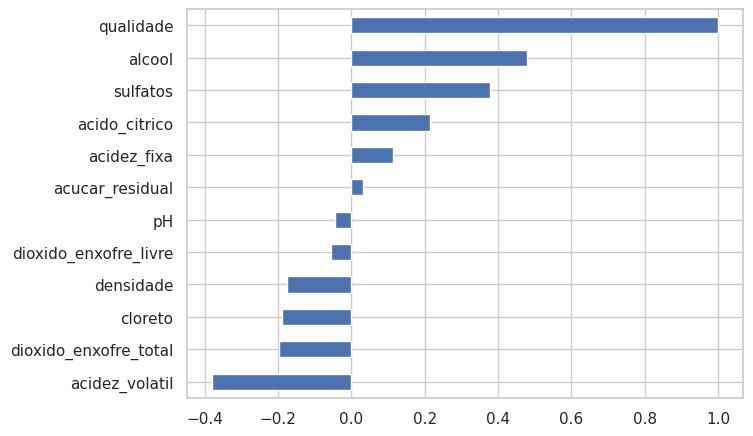

In [8]:
df.corr(method = "spearman", numeric_only = True)['qualidade'].sort_values().plot(kind = 'barh')

<Axes: >

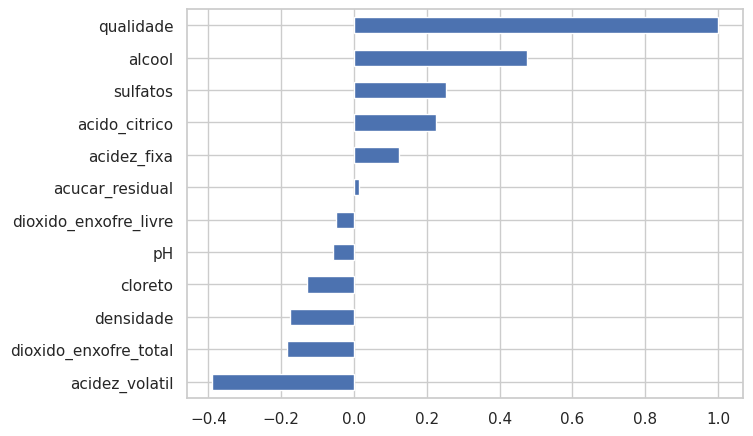

In [9]:
df.corr(method = "pearson", numeric_only = True)['qualidade'].sort_values().plot(kind = 'barh')

## Análise de Relação entre Teor Alcoólico de Vinhos e Qualidade

Nesta análise, investigamos a relação entre a pontuação de vinhos e seu teor alcoólico. Os resultados revelam uma tendência notável: vinhos com classificação superior (9) tendem a apresentar teores alcoólicos mais elevados. No entanto, é crucial observar que a presença de um alto teor alcoólico não é, por si só, um indicativo infalível de qualidade, visto que identificamos casos atípicos de vinhos com uma pontuação de 5 que exibem elevado teor alcoólico.


<Axes: xlabel='qualidade', ylabel='alcool'>

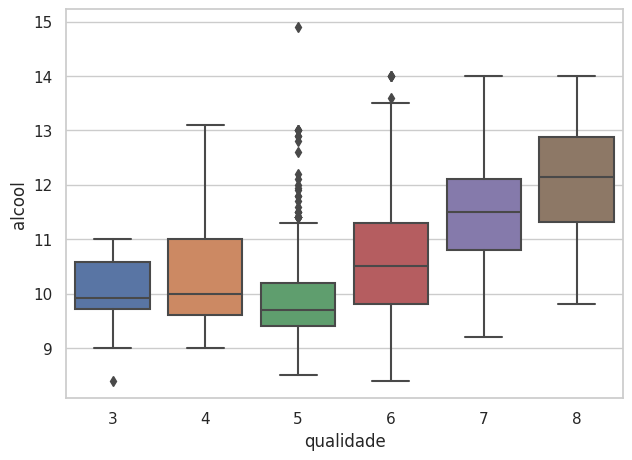

In [11]:
sns.boxplot(data = df,
           x = "qualidade",
           y = "alcool")

<Axes: xlabel='alcool', ylabel='Density'>

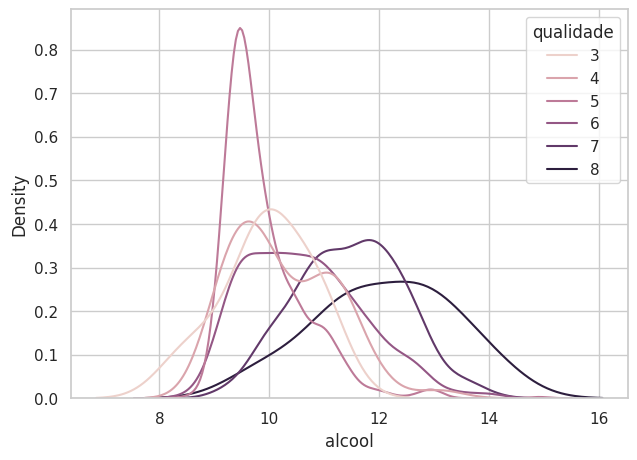

In [12]:
sns.kdeplot(data = df,
           x = "alcool",
           hue = "qualidade",
           common_norm = False)

# density é a densidade da distribuição

## Análise das Relações entre Classificação de Vinhos e Teor Alcoólico

Neste estudo, exploramos as relações entre a classificação de vinhos e seu teor alcoólico com base em dados empíricos. O gráfico apresentado acima ilustra as conclusões extraídas dessa análise.

## Resultados da Análise

O gráfico confirma de forma convincente a existência de uma correlação entre a classificação dos vinhos e seu teor alcoólico. Em particular, destacamos as seguintes descobertas:

- Vinhos com classificações mais elevadas, variando entre 7 e 9, exibem um teor alcoólico superior. Isso é evidenciado pela presença de um pico notável na densidade de amostras de vinho, concentrado entre 11 e 13 graus de álcool.

- Por outro lado, os vinhos com classificações mais baixas apresentam uma densidade de amostras mais significativa em uma faixa de graduação alcoólica entre 9 e 10.

Esses resultados sugerem que o teor alcoólico pode ser um fator relevante na classificação de vinhos, com vinhos mais alcoólicos geralmente recebendo classificações mais altas. Essa associação entre classificação e teor alcoólico pode ser de interesse para produtores, apreciadores e entusiastas de vinho que desejam compreender melhor os fatores subjacentes à apreciação de vinhos.

É importante notar que essa análise se baseia em dados disponíveis e pode não capturar todas as nuances do mundo dos vinhos. No entanto, os resultados aqui apresentados oferecem uma visão valiosa das relações entre classificação de vinhos e teor alcoólico, proporcionando um ponto de partida para investigações mais aprofundadas e tomada de decisões informadas.


## Análise univariada

In [45]:
df.describe(include='all')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.864290
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## Histogramas das features

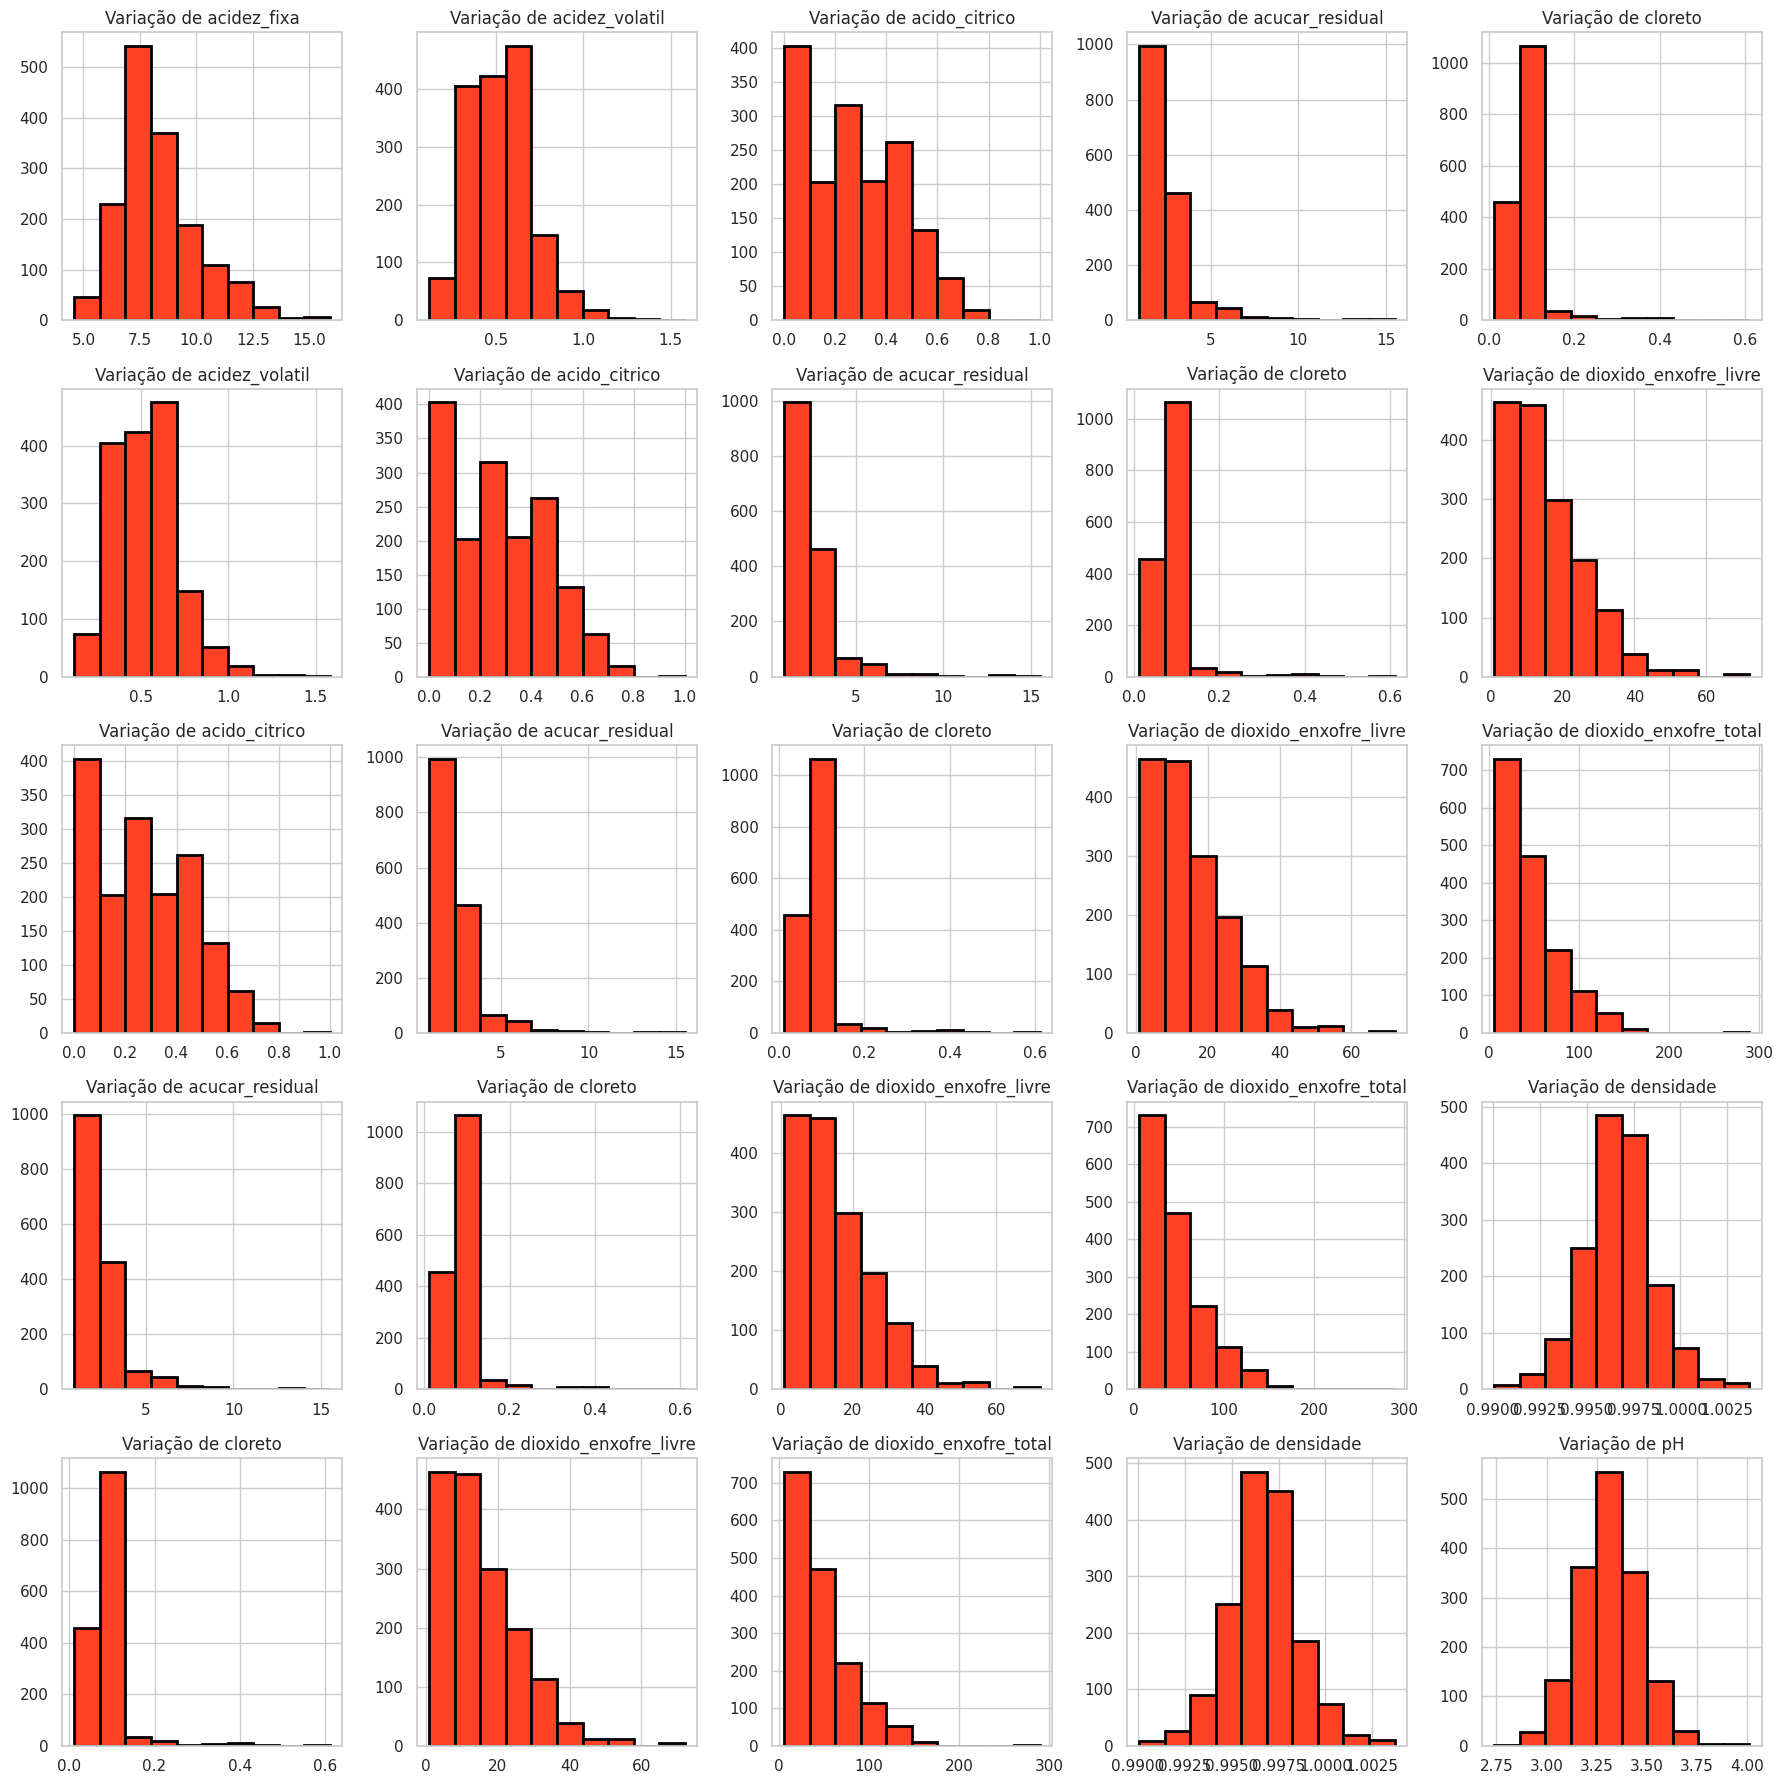

In [13]:
fig, axes = plt.subplots(5, 5)
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
           'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
for i in range(5):
    for j in range(5):
        axes[i, j].hist(x=colunas[i + j], data=df,
                        edgecolor='#000000', linewidth=2, color='#ff4125')
        axes[i, j].set_title('Variação de ' + colunas[i + j])
fig = plt.gcf()
fig.set_size_inches(18, 18)
fig.tight_layout()


## Correlação entre as features usando um mapa de correlação

<Axes: >

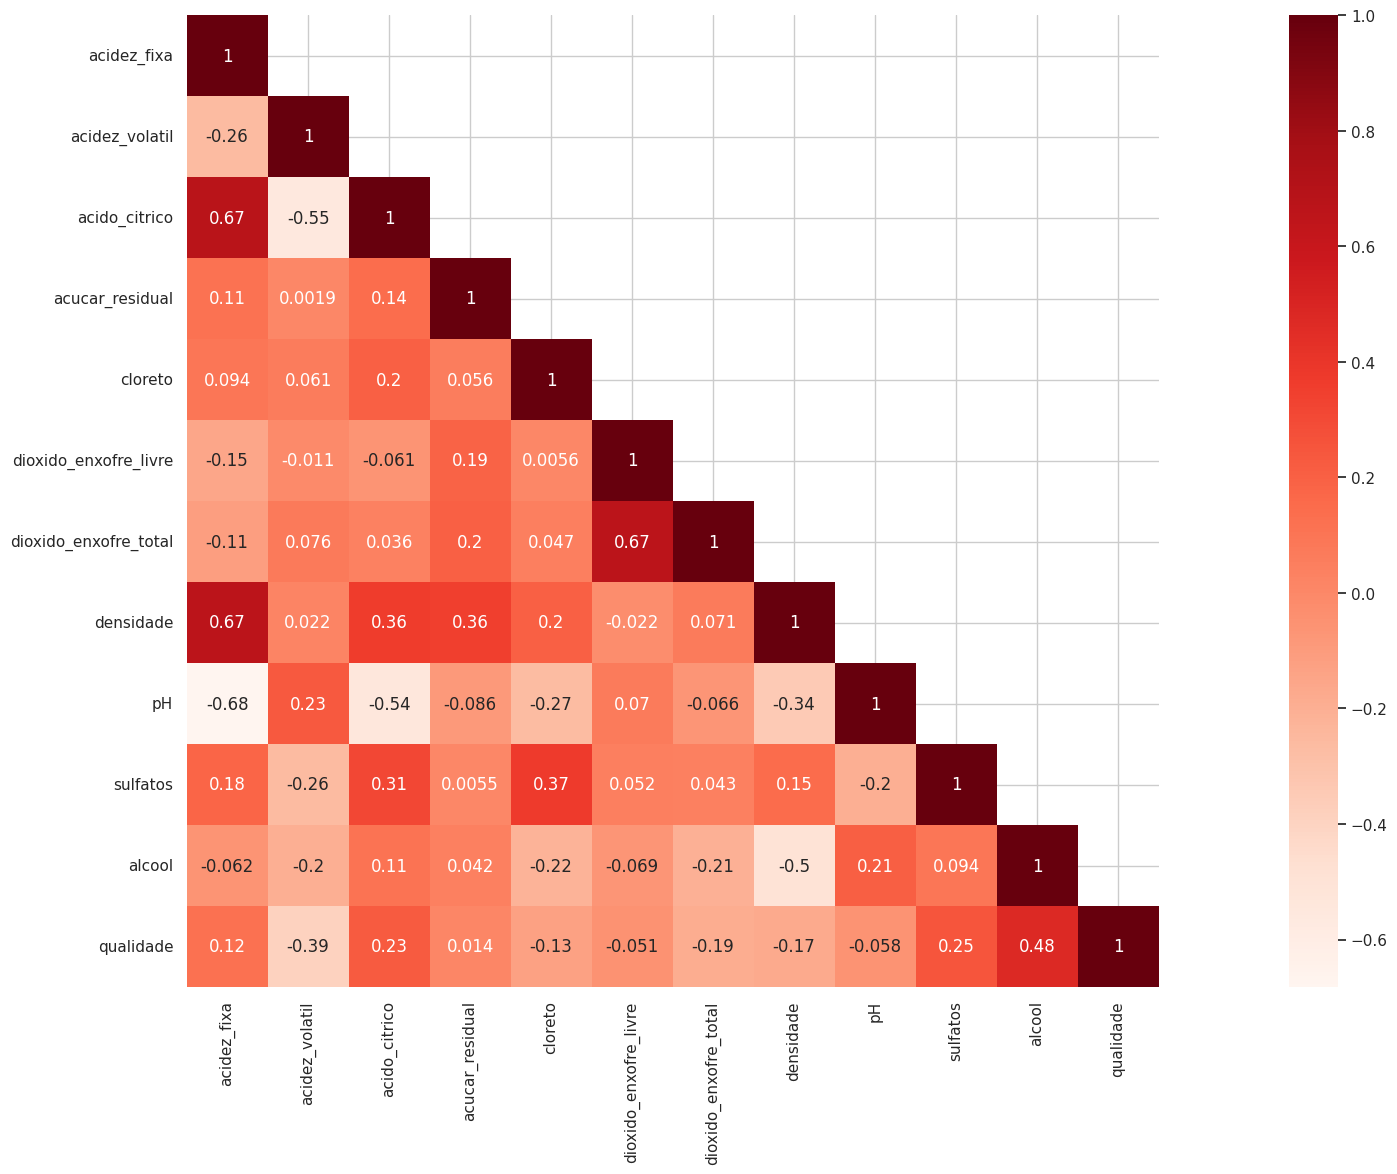

In [14]:
matriz_correlacao = df.corr()
mascara = np.array(matriz_correlacao)
mascara[np.tril_indices_from(mascara)] = False
figura = plt.gcf()
figura.set_size_inches(30, 12)

# Usar a paleta de cores "Reds" para criar um degradê de tons de vermelho
sns.heatmap(data=matriz_correlacao, mask=mascara, square=True, annot=True, cbar=True, cmap="Reds")


**INFERÊNCIAS DO MAPA DE CALOR ACIMA:**

1. A qualidade do vinho está altamente relacionada à acidez volátil.

2. Além disso, a qualidade do vinho está altamente correlacionada com o teor alcoólico.

3. O pH e o ácido cítrico/ acidez fixa estão altamente inversamente relacionados, pois todos sabemos que os ácidos têm valores de pH menores.

4. A relação consigo mesma (ou seja, de uma característica consigo mesma) é igual a 1, como esperado.

5. Outras inferências semelhantes podem ser feitas.

Agora é possível visualizar a variação da qualidade em relação a distintos atributos numéricos.


A função cria e exibe três gráficos em uma única chamada, usando os parâmetros fornecidos. É útil quando desejar visualizar diferentes aspectos da relação entre duas variáveis em um conjunto de dados.

In [15]:
def plot(feature_x, target='qualidade'):
    sns.catplot(x=target, y=feature_x, data=df, kind='bar', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='violin', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='swarm', height=5, aspect=1)

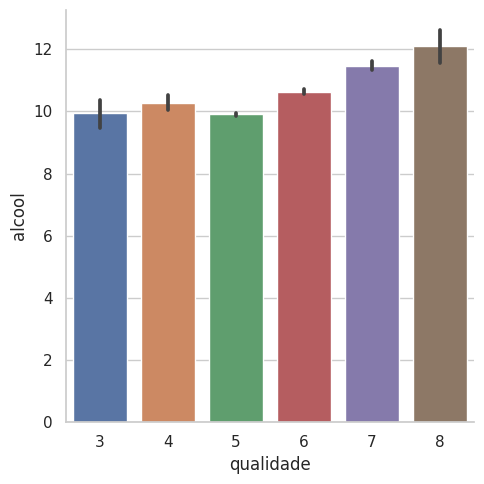

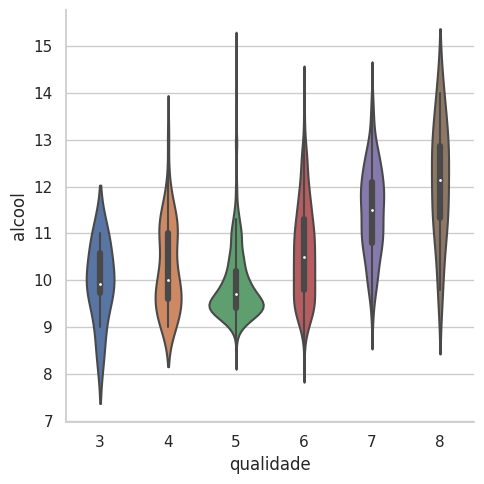

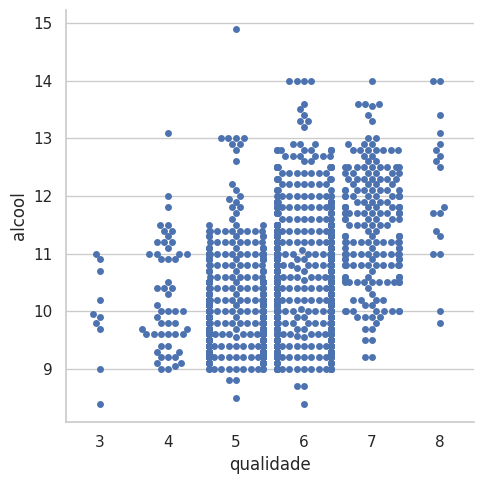

In [16]:
plot('alcool','qualidade')

# Modelagem de Dados

In [17]:
intervalos = (2, 6.5, 8)
nomes_grupos = ['ruim', 'bom']
df['qualidade'] = pd.cut(df['qualidade'], bins=intervalos, labels=nomes_grupos)

In [18]:
# Cria uma instância do LabelEncoder
codificador_rotulos = LabelEncoder()


 Uma explicação sucinta sobre o LabelEncoder: Esta classe, parte da biblioteca scikit-learn (sklearn), é amplamente empregada para converter rótulos (categorias) em variáveis categóricas em valores numéricos. Essa conversão é essencial ao treinar modelos de aprendizado de máquina que exigem entradas numéricas em vez de categóricas. Por exemplo, permite transformar rótulos de classes, como "ruim" e "bom", em valores 0 e 1, tornando-os adequados como entradas para modelos de machine learning.

In [19]:
# "Ruim" se torna 0 e "Bom" se torna 1
df['qualidade'] = codificador_rotulos.fit_transform(df['qualidade'])


**Divisão de Dados para Treinamento e Teste:**

Este código divide um conjunto de dados em duas partes: uma para treinar um modelo de machine learning (conjunto de treinamento) e outra para testar o modelo (conjunto de teste). Ele separa as características do conjunto de destino (rótulos) e permite avaliar o desempenho do modelo ao usar dados que não foram usados no treinamento.

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    df.drop('qualidade', axis=1), df['qualidade'], test_size=0.25, random_state=42)


## Comparação entre os modelos de classificação através de métricas de desempenho.

As métricas utilizadas são a acurácia, a precisão, o recall e o F1-Score. Elas desempenham papéis fundamentais na avaliação de modelos de classificação, cada um fornecendo insights valiosos sobre o desempenho do modelo.

Enquanto a acurácia mede a proporção de previsões corretas em relação ao total de previsões, ela pode ser enganosa em cenários desequilibrados, nos quais uma classe é muito mais prevalente que a outra, como é o caso deste DataSet.Nesses casos, um modelo tende a favorecer a classe majoritária e a acurácia pode ser alta, mas a capacidade de identificar a classe minoritária é inadequada.

A precisão mensura a proporção de previsões positivas corretas em relação ao total de previsões positivas, o recall avalia a proporção de exemplos positivos corretamente identificados em relação ao total de exemplos verdadeiramente positivos, e o F1-Score combina precisão e recall para obter uma métrica mais equilibrada.

Portanto, a consideração dessas métricas é essencial para garantir que o modelo atenda aos objetivos específicos da tarefa de classificação e não seja avaliado apenas com base na acurácia, que, sozinha, pode não refletir o desempenho real do modelo, especialmente em situações de desequilíbrio de classes.

In [21]:
# Lista de modelos de classificação
modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]


nomes_dos_modelos = ['KNearestNeighbors','RandomForestClassifier','DecisionTree']

acuracias = []  # Lista para armazenar as acurácias dos modelos
precisoes = []  # Lista para armazenar as precisões dos modelos
recalls = []    # Lista para armazenar os recalls dos modelos
f1_scores = []  # Lista para armazenar os f1-scores dos modelos
resultados = {}  # Dicionário para armazenar os resultados

for i, modelo in enumerate(modelos):
    clf = modelo  # clf é uma abreviação comum para "classificador"
    clf.fit(x_treino, y_treino)  # Treina o classificador com os dados de treinamento
    previsoes = clf.predict(x_teste)  # Faz previsões com o conjunto de teste
    acuracia = accuracy_score(previsoes, y_teste)  # Calcula a acurácia das previsões
    precisao = precision_score(previsoes, y_teste) # Calcula a precisão das previsões
    recall = recall_score(previsoes, y_teste) # Calcula o recall das previsões
    f1_sc = f1_score(previsoes, y_teste) # Calcula o F1-Score das previsões
    acuracias.append(acuracia)  # Adiciona a acurácia à lista de acurácias
    precisoes.append(precisao) # Adiciona a precisão à lista de precisões
    recalls.append(recall) # Adiciona o recall à lista de recalls
    f1_scores.append(f1_sc) # Adiciona o F1-Score à lista de F1_scores

# Preenche o dicionário de resultados com os nomes dos modelos e suas acurácias correspondentes
resultados['Algoritmo de Modelagem'] = nomes_dos_modelos
resultados['Acurácia'] = acuracias
resultados['Precisão'] = precisoes
resultados['Recall'] = recalls
resultados['F1-Score'] = f1_scores

resultados  # Retorna o dicionário de resultados

{'Algoritmo de Modelagem': ['KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree'],
 'Acurácia': [0.8625, 0.9125, 0.885],
 'Precisão': [0.9596541786743515, 0.9654178674351584, 0.9221902017291066],
 'Recall': [0.8903743315508021, 0.9357541899441341, 0.943952802359882],
 'F1-Score': [0.9237170596393898, 0.9503546099290779, 0.9329446064139942]}

In [22]:
acuracias_frame = pd.DataFrame(resultados)
acuracias_frame

,Algoritmo de Modelagem,Acurácia,Precisão,Recall,F1-Score
0,KNearestNeighbors,0.8625,0.959654,0.890374,0.923717
1,RandomForestClassifier,0.9125,0.965418,0.935754,0.950355
2,DecisionTree,0.8850,0.922190,0.943953,0.932945


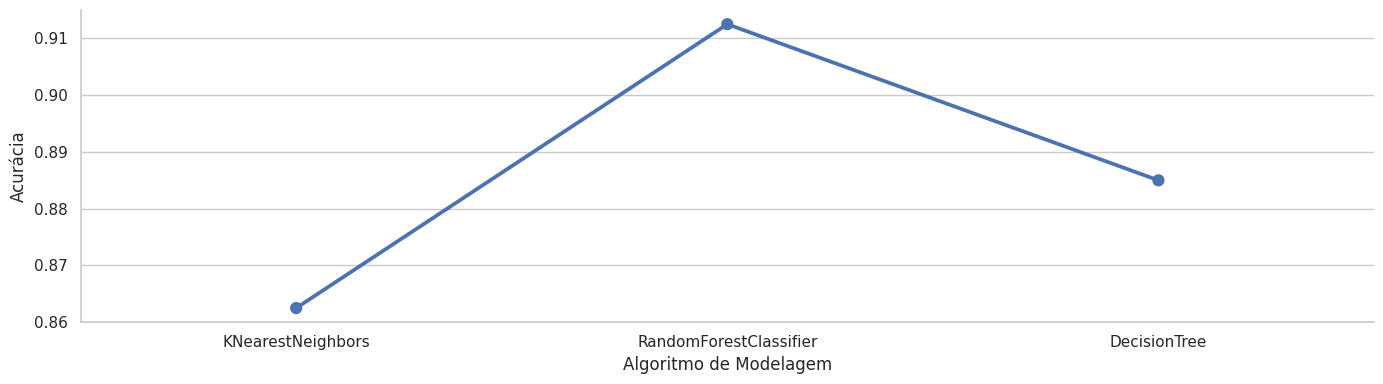

In [23]:
sns.catplot(x='Algoritmo de Modelagem',y='Acurácia',data=acuracias_frame, kind='point', height=4, aspect=3.5)

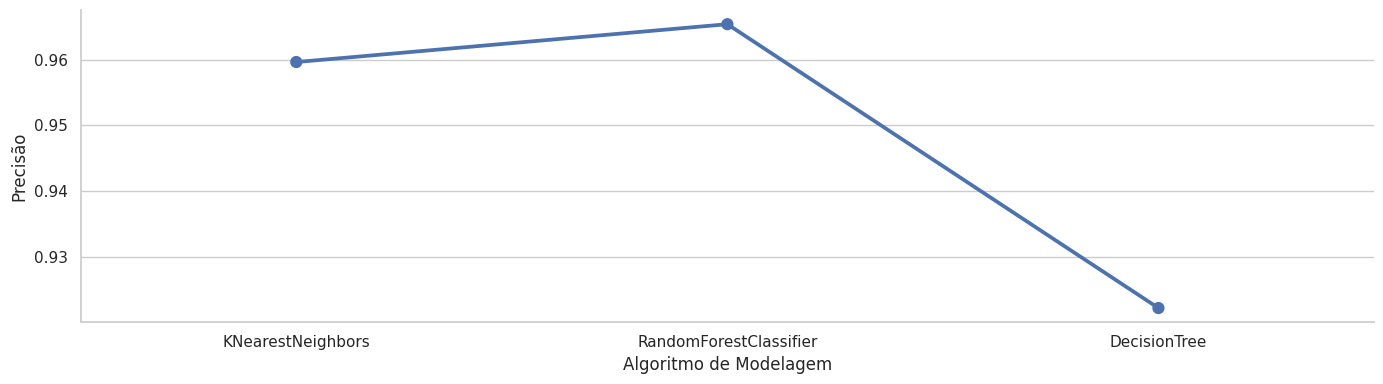

In [24]:
sns.catplot(x='Algoritmo de Modelagem',y='Precisão',data=acuracias_frame, kind='point', height=4, aspect=3.5)

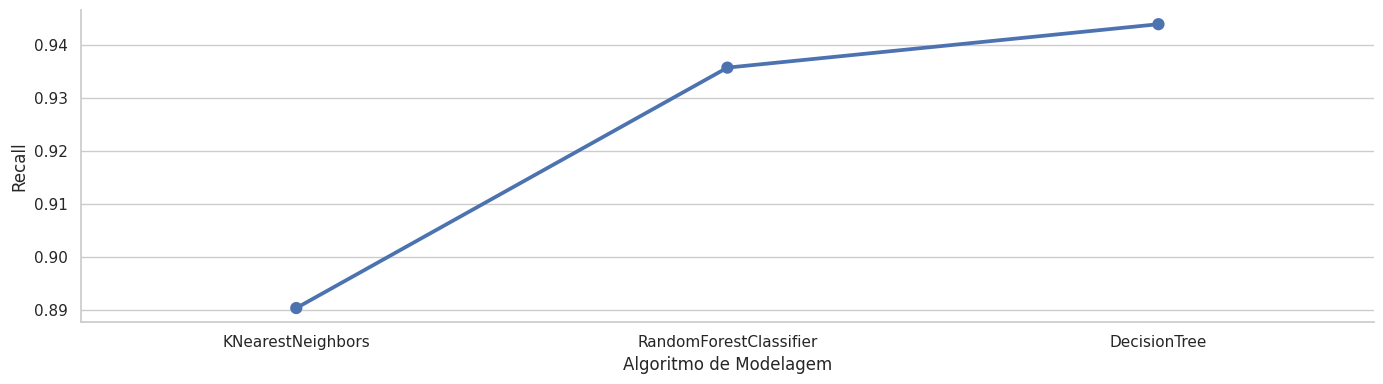

In [25]:
sns.catplot(x='Algoritmo de Modelagem',y='Recall',data=acuracias_frame, kind='point', height=4, aspect=3.5)

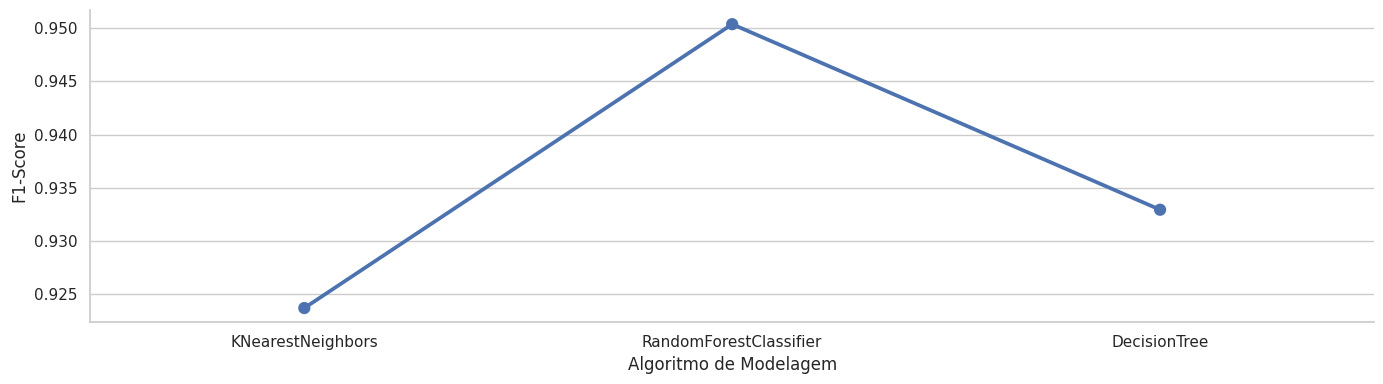

In [26]:
sns.catplot(x='Algoritmo de Modelagem',y='F1-Score',data=acuracias_frame, kind='point', height=4, aspect=3.5)

No contexto da análise de dados, é importante notar que, inicialmente, as características não foram submetidas a nenhum tipo de escala. Isso significa que essas características têm diferentes escalas, o que implica que seus valores estão em intervalos ou unidades distintas. Agora, com o objetivo de entender melhor o impacto disso, a próxima etapa é realizar a escala das características. O escalonamento de características é uma prática comum em ciência de dados, utilizada para padronizar as características em uma escala uniforme. Essa ação visa avaliar como essa padronização afeta os resultados e o desempenho do modelo ou da análise em questão.

In [27]:
def avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nome_escalonador):
    # Lista de modelos a serem avaliados
# Lista de modelos de classificação
    modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]

    resultados_acuracia = []
    resultados_precisao = []
    resultados_recall = []
    resultados_f1Score = []

    # Avaliar cada modelo
    for modelo in modelos:
        clf = modelo
        clf.fit(x_treino, y_treino)
        previsoes = clf.predict(x_teste)
        resultados_acuracia.append(accuracy_score(previsoes, y_teste))
        resultados_precisao.append(precision_score(previsoes, y_teste))
        resultados_recall.append(recall_score(previsoes, y_teste))
        resultados_f1Score.append(f1_score(previsoes, y_teste))

    # Armazenar os resultados no dataframe
    acuracias_frame[f'Acuracia_{nome_escalonador}'] = np.array(resultados_acuracia)
    acuracias_frame[f'Precisao_{nome_escalonador}'] = np.array(resultados_precisao)
    acuracias_frame[f'Recall_{nome_escalonador}'] = np.array(resultados_recall)
    acuracias_frame[f'F1Score_{nome_escalonador}'] = np.array(resultados_f1Score)


In [28]:
# Extrair o array de labels 'qualidade' do DataFrame
Y = df['qualidade'].to_numpy()

# Lista de escaladores a serem aplicados aos dados
escaladores = [MinMaxScaler(), StandardScaler()]

# Nomes descritivos para os resultados dos escaladores
nomes_escalonadores = ['Min_Max_Scaler', 'Standard_Scaler']

# Iterar através dos escaladores e avaliar os modelos
for escala in range(len(escaladores)):
    escalador = escaladores[escala]

    # Aplicar o escalador aos dados
    escalador.fit(df)
    df_escalado = escalador.transform(df)

    # Selecionar as características escaladas
    X = df_escalado[:,0:6]

    # Reatribuir Y com os rótulos de 'qualidade'
    Y = df['qualidade'].to_numpy()

    # Dividir os dados em treino e teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(
        X, Y, test_size=0.25, random_state=42)

    # Avaliar os modelos com o nome do escalador correspondente
    avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nomes_escalonadores[escala])


## Escalonamento dos dados

Vamos avaliar como diferentes técnicas de escalonamento afetam o desempenho de modelos de classificação.

Utilizando a função `avaliar_modelos`, o código examina vários modelos de classificação em dados de treinamento e teste, fornecendo resultados que permitem a comparação do desempenho desses modelos após a aplicação de técnicas de escalonamento, como Min-Max Scaling e Standard Scaling.

Esse processo é fundamental para determinar qual abordagem de pré-processamento de dados é mais eficaz na otimização do desempenho dos modelos.

In [29]:
acuracias_frame

,Algoritmo de Modelagem,Acurácia,Precisão,Recall,F1-Score,Acuracia_Min_Max_Scaler,Precisao_Min_Max_Scaler,Recall_Min_Max_Scaler,F1Score_Min_Max_Scaler,Acuracia_Standard_Scaler,Precisao_Standard_Scaler,Recall_Standard_Scaler,F1Score_Standard_Scaler
0,KNearestNeighbors,0.8625,0.959654,0.890374,0.923717,0.8725,0.965418,0.895722,0.929265,0.8725,0.956772,0.902174,0.928671
1,RandomForestClassifier,0.9125,0.965418,0.935754,0.950355,0.8975,0.971182,0.915761,0.942657,0.9025,0.974063,0.918478,0.945455
2,DecisionTree,0.8850,0.922190,0.943953,0.932945,0.8175,0.867435,0.917683,0.891852,0.8275,0.878963,0.918675,0.898380


Observações:

1. As precisões aumentam marginalmente ao realizar o escalonamento.

2. O StandardScaling parece proporcionar resultados ligeiramente superiores em comparação com o MinMaxScaling.


- Portanto o Standart Scaler foi o método escolhido.

In [30]:
#Preparando os dados para os Modelos de Machine Learning com o Standart Scaler

# Extrai a coluna 'qualidade' como o alvo (variável de saída) Y e converte-a em um array NumPy.
Y = df['qualidade'].to_numpy()

# Prepara as features (variáveis de entrada) utilizando um StandardScaler para padronização dos dados, uma vez que isso produziu resultados melhores no passado.
escalador = StandardScaler()
df_escalado = escalador.fit_transform(df)
X = df_escalado[:, 0:11]  # Seleciona as colunas de 0 a 10 como as features padronizadas.

# Reatribui Y para garantir que estamos usando a variável alvo correta.
Y = df['qualidade'].to_numpy()

# Divide os dados em conjuntos de treinamento e teste usando a função train_test_split.
# 75% dos dados serão usados para treinamento (x_treino, y_treino) e 25% para teste (x_teste, y_teste).
# O valor de random_state é definido como 42 para garantir a reprodutibilidade dos resultados.
x_treino, x_teste, y_treino, y_teste, = train_test_split(X, Y, test_size=0.25, random_state=42)



#Avaliação dos modelos através de matrizes de confusão

###   1. KNN

In [31]:
# Cria uma lista de valores para o número de vizinhos
lista_vizinhos = [i + 1 for i in range(100)]

# Define um dicionário de parâmetros para o KNeighborsClassifier
parametros_knn = {'n_neighbors': lista_vizinhos, 'weights': ['uniform', 'distance']} # 'n_jobs': [-1]


# Cria um classificador KNeighborsClassifier com busca em grade

classificador_knn_acc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='accuracy', cv=10)

classificador_knn_bacc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='balanced_accuracy', cv=10)

classificador_knn_avp = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='average_precision', cv=10)

classificador_knn_roc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='roc_auc', cv=10)


# Treina o classificador com os dados de treinamento
classificador_knn_acc.fit(x_treino,y_treino)

classificador_knn_bacc.fit(x_treino,y_treino)

classificador_knn_avp.fit(x_treino,y_treino)

classificador_knn_roc.fit(x_treino,y_treino)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [32]:
print(f'KNN - Accuracy: Best Params: {classificador_knn_acc.best_params_}  e Best Score: {classificador_knn_acc.best_score_}')

print(f'KNN - Balanced Accuracy: Best Params: {classificador_knn_bacc.best_params_}  e Best Score: {classificador_knn_bacc.best_score_}')

print(f'KNN - average precision: Best Params: {classificador_knn_avp.best_params_}  e Best Score: {classificador_knn_avp.best_score_}')

print(f'KNN - ROC : Best Params: {classificador_knn_roc.best_params_}  e Best Score: {classificador_knn_roc.best_score_}')


KNN - Accuracy: Best Params: {'n_neighbors': 66, 'weights': 'distance'}  e Best Score: 0.9099579831932774
KNN - Balanced Accuracy: Best Params: {'n_neighbors': 2, 'weights': 'uniform'}  e Best Score: 0.7749232581382068
KNN - average precision: Best Params: {'n_neighbors': 95, 'weights': 'distance'}  e Best Score: 0.9854716154945147
KNN - ROC : Best Params: {'n_neighbors': 85, 'weights': 'distance'}  e Best Score: 0.9191748945657426


In [33]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_acc = classificador_knn_acc.predict(x_teste)
previsoes_bacc = classificador_knn_bacc.predict(x_teste)
previsoes_avp = classificador_knn_avp.predict(x_teste)
previsoes_roc = classificador_knn_roc.predict(x_teste)

previsoes_acc_treino = classificador_knn_acc.predict(x_treino)
previsoes_bacc_treino = classificador_knn_bacc.predict(x_treino)
previsoes_avp_treino = classificador_knn_avp.predict(x_treino)
previsoes_roc_treino = classificador_knn_roc.predict(x_treino)

# Calcula a acurácia, precisão, recall e F1-Score das previsões comparando com os valores reais nos dados de teste.
print(f'KNN - Accuracy: Accuracy Score: {accuracy_score(previsoes_acc, y_teste)}  e Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_acc_treino, y_treino)}')
print(f'KNN - Accuracy: Precision Score: {precision_score(previsoes_acc, y_teste)}  e Accuracy: Precision Score TREINO: {precision_score(previsoes_acc_treino, y_treino)}')
print(f'KNN - Accuracy: Recall Score: {recall_score(previsoes_acc, y_teste)}  e Accuracy: Recall Score TREINO: {recall_score(previsoes_acc_treino, y_treino)}')
print(f'KNN - Accuracy: F1-Score Score: {f1_score(previsoes_acc, y_teste)}  e Accuracy: F1-Score Score TREINO: {f1_score(previsoes_acc_treino, y_treino)}')
print("\n")
print(f'KNN - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_bacc_treino, y_treino)}')
print(f'KNN - Balanced Accuracy: Precision Score: {precision_score(previsoes_bacc, y_teste)}  e Balanced Accuracy: Precision Score TREINO: {precision_score(previsoes_bacc_treino, y_treino)}')
print(f'KNN - Balanced Accuracy: Recall Score: {recall_score(previsoes_bacc, y_teste)}  e Balanced Accuracy: Recall Score TREINO: {recall_score(previsoes_bacc_treino, y_treino)}')
print(f'KNN - Balanced Accuracy: F1-Score Score: {f1_score(previsoes_bacc, y_teste)}  e Balanced Accuracy: F1-Score Score TREINO: {f1_score(previsoes_bacc_treino, y_treino)}')
print("\n")
print(f'KNN - Average Precision: Accuracy Score: {accuracy_score(previsoes_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_avp_treino, y_treino)}')
print(f'KNN - Average Precision: Precision Score: {precision_score(previsoes_avp, y_teste)}  e Average Precision: Precision Score TREINO: {precision_score(previsoes_avp_treino, y_treino)}')
print(f'KNN - Average Precision: Recall Score: {recall_score(previsoes_avp, y_teste)}  e Average Precision: Recall Score TREINO: {recall_score(previsoes_avp_treino, y_treino)}')
print(f'KNN - Average Precision: F1-Score Score: {f1_score(previsoes_avp, y_teste)}  e Average Precision: F1-Score Score TREINO: {f1_score(previsoes_avp_treino, y_treino)}')
print("\n")
print(f'KNN - ROC : Accuracy Score: {accuracy_score(previsoes_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_roc_treino, y_treino)}')
print(f'KNN - ROC: Precision Score: {precision_score(previsoes_roc, y_teste)}  e ROC: Precision Score TREINO: {precision_score(previsoes_roc_treino, y_treino)}')
print(f'KNN - ROC: Recall Score: {recall_score(previsoes_roc, y_teste)}  e ROC: Recall Score TREINO: {recall_score(previsoes_roc_treino, y_treino)}')
print(f'KNN - ROC: F1-Score Score: {f1_score(previsoes_roc, y_teste)}  e ROC: F1-Score Score TREINO: {f1_score(previsoes_roc_treino, y_treino)}')


KNN - Accuracy: Accuracy Score: 0.9075  e Accuracy: Accuracy Score TREINO: 1.0
KNN - Accuracy: Precision Score: 0.9827089337175793  e Accuracy: Precision Score TREINO: 1.0
KNN - Accuracy: Recall Score: 0.9166666666666666  e Accuracy: Recall Score TREINO: 1.0
KNN - Accuracy: F1-Score Score: 0.9485396383866481  e Accuracy: F1-Score Score TREINO: 1.0


KNN - Balanced Accuracy: Accuracy Score: 0.8325 e Balanced Accuracy: Accuracy Score TREINO: 0.9407839866555463
KNN - Balanced Accuracy: Precision Score: 0.8386167146974063  e Balanced Accuracy: Precision Score TREINO: 0.9314009661835749
KNN - Balanced Accuracy: Recall Score: 0.9635761589403974  e Balanced Accuracy: Recall Score TREINO: 1.0
KNN - Balanced Accuracy: F1-Score Score: 0.8967642526964561  e Balanced Accuracy: F1-Score Score TREINO: 0.9644822411205604


KNN - Average Precision: Accuracy Score: 0.91  e Average Precision: Accuracy Score TREINO: 1.0
KNN - Average Precision: Precision Score: 0.9942363112391931  e Average Precision: Pr

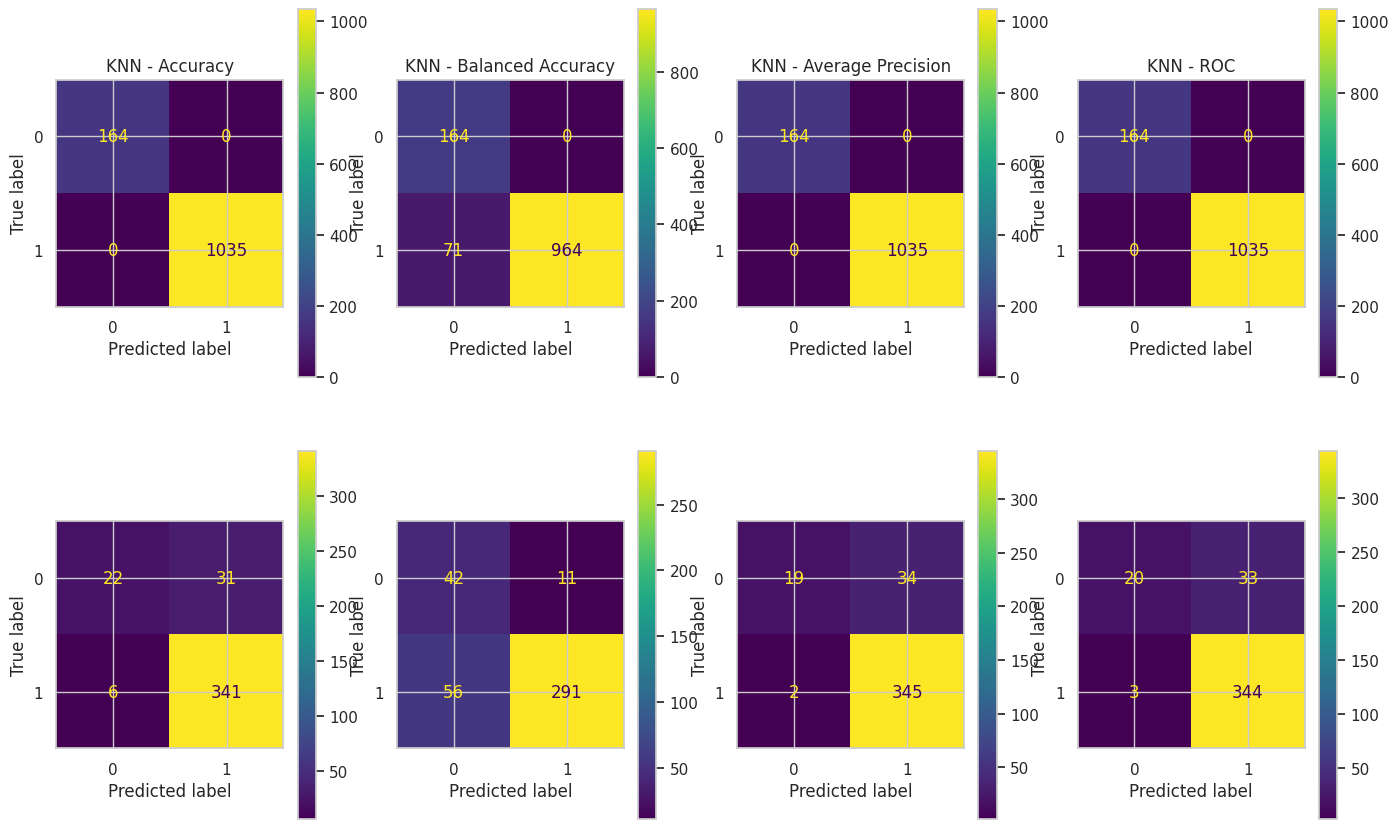

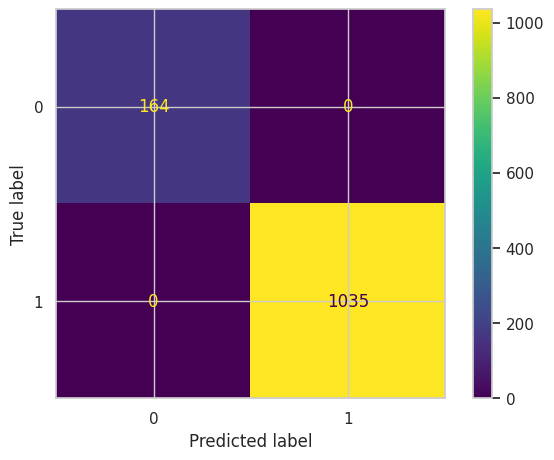

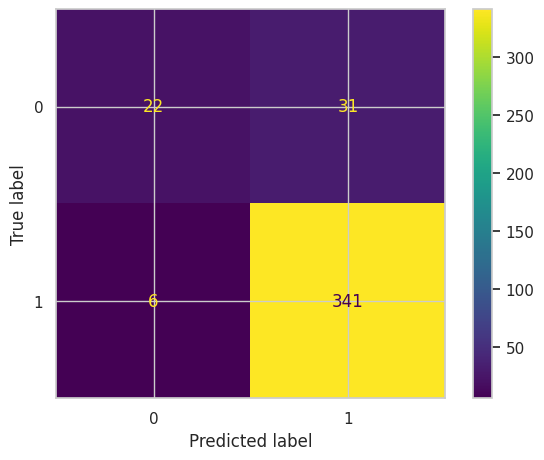

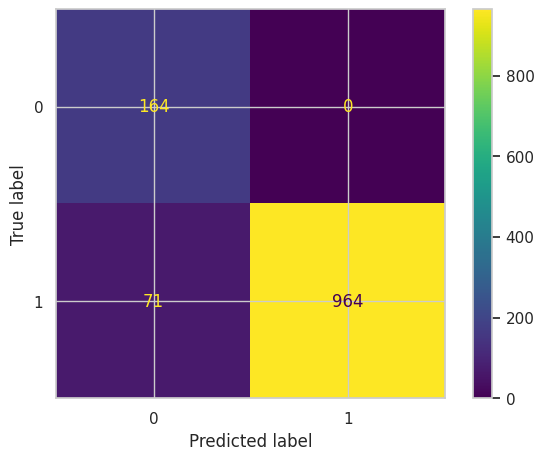

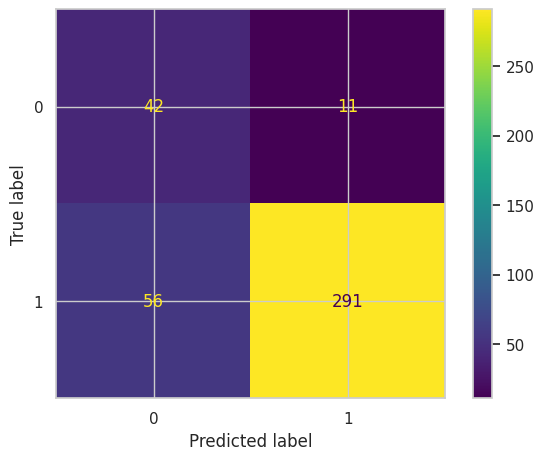

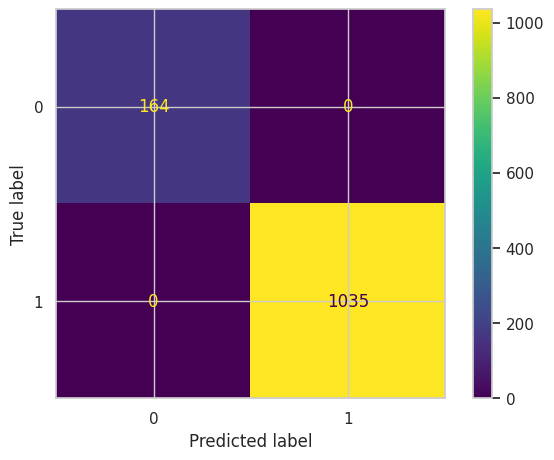

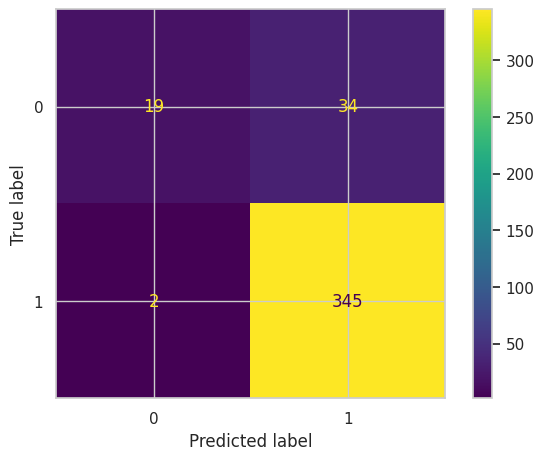

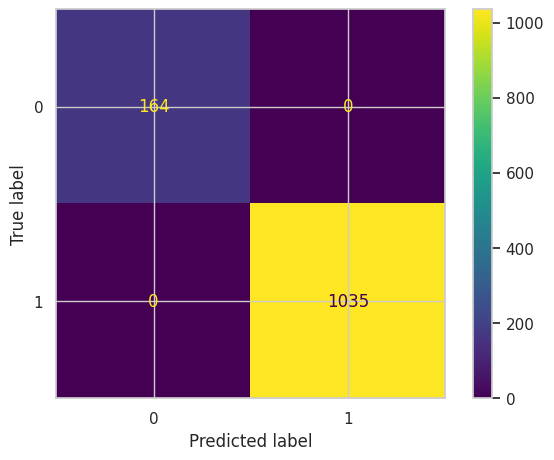

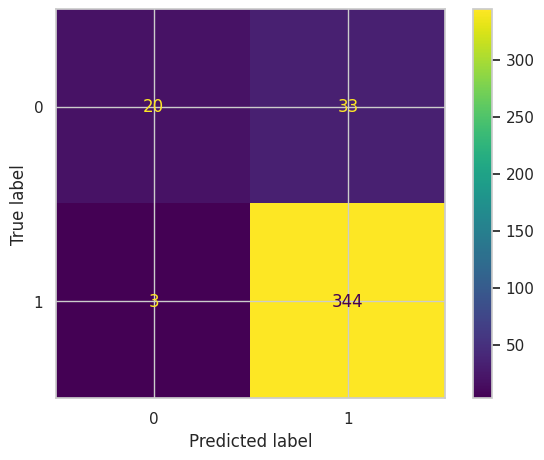

In [34]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("KNN - Accuracy")
axs[0,1].set_title("KNN - Balanced Accuracy")
axs[0,2].set_title("KNN - Average Precision")
axs[0,3].set_title("KNN - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_roc).plot(ax = axs[1,3])
plt.show()


Então observamos que o KNN parece overfitar em todas as combinações de hiperparâmetros que fizemos.

###   2. Decision Tree

In [35]:
# Definição dos parâmetros para o Random Forest
parametros_dt = {'max_depth':range(1,8)}  # Método de seleção de características

# Criação do classificador Random Forest com Grid Search
classificador_dt_acc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,  # Parâmetros a serem ajustados
                                scoring='accuracy',  # Métrica de avaliação
                                cv=10)  # Validação cruzada com 10 folds

classificador_dt_bacc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,
                                scoring='balanced_accuracy',
                                cv=10)

classificador_dt_avp = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,
                                scoring='average_precision',
                                cv=10)

classificador_dt_roc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,
                                scoring='roc_auc',
                                cv=10)  #

# Treinamento do classificador Random Forest
classificador_dt_acc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_bacc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_avp.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_roc.fit(x_treino, y_treino)  # Dados de treinamento


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [36]:
print(f'DT - Accuracy: Best Params: {classificador_dt_acc.best_params_}  e Best Score: {classificador_dt_acc.best_score_}')

print(f'DT - Balanced Accuracy: Best Params: {classificador_dt_bacc.best_params_}  e Best Score: {classificador_dt_bacc.best_score_}')

print(f'DT - average precision: Best Params: {classificador_dt_avp.best_params_}  e Best Score: {classificador_dt_avp.best_score_}')

print(f'DT - ROC : Best Params: {classificador_dt_roc.best_params_}  e Best Score: {classificador_dt_roc.best_score_}')


DT - Accuracy: Best Params: {'max_depth': 3}  e Best Score: 0.8866036414565827
DT - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.7128455443043535
DT - average precision: Best Params: {'max_depth': 3}  e Best Score: 0.9547522391918791
DT - ROC : Best Params: {'max_depth': 4}  e Best Score: 0.8237286797654088


In [37]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_dt_acc = classificador_dt_acc.predict(x_teste)
previsoes_dt_bacc = classificador_dt_bacc.predict(x_teste)
previsoes_dt_avp = classificador_dt_avp.predict(x_teste)
previsoes_dt_roc = classificador_dt_roc.predict(x_teste)

previsoes_dt_acc_treino = classificador_dt_acc.predict(x_treino)
previsoes_dt_bacc_treino = classificador_dt_bacc.predict(x_treino)
previsoes_dt_avp_treino = classificador_dt_avp.predict(x_treino)
previsoes_dt_roc_treino = classificador_dt_roc.predict(x_treino)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.

# Calcula a acurácia, precisão, recall e F1-Score das previsões comparando com os valores reais nos dados de teste.
print(f'DT - Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_acc, y_teste)}  e Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: Precision Score: {precision_score(previsoes_dt_acc, y_teste)}  e Accuracy: Precision Score TREINO: {precision_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: Recall Score: {recall_score(previsoes_dt_acc, y_teste)}  e Accuracy: Recall Score TREINO: {recall_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: F1-Score Score: {f1_score(previsoes_dt_acc, y_teste)}  e Accuracy: F1-Score Score TREINO: {f1_score(previsoes_dt_acc_treino, y_treino)}')
print("\n")
print(f'DT - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: Precision Score: {precision_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: Precision Score TREINO: {precision_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: Recall Score: {recall_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: Recall Score TREINO: {recall_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: F1-Score Score: {f1_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: F1-Score Score TREINO: {f1_score(previsoes_dt_bacc_treino, y_treino)}')
print("\n")
print(f'DT - Average Precision: Accuracy Score: {accuracy_score(previsoes_dt_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: Precision Score: {precision_score(previsoes_dt_avp, y_teste)}  e Average Precision: Precision Score TREINO: {precision_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: Recall Score: {recall_score(previsoes_dt_avp, y_teste)}  e Average Precision: Recall Score TREINO: {recall_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: F1-Score Score: {f1_score(previsoes_dt_avp, y_teste)}  e Average Precision: F1-Score Score TREINO: {f1_score(previsoes_dt_avp_treino, y_treino)}')
print("\n")
print(f'DT - ROC : Accuracy Score: {accuracy_score(previsoes_dt_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: Precision Score: {precision_score(previsoes_dt_roc, y_teste)}  e ROC: Precision Score TREINO: {precision_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: Recall Score: {recall_score(previsoes_dt_roc, y_teste)}  e ROC: Recall Score TREINO: {recall_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: F1-Score Score: {f1_score(previsoes_dt_roc, y_teste)}  e ROC: F1-Score Score TREINO: {f1_score(previsoes_dt_roc_treino, y_treino)}')


DT - Accuracy: Accuracy Score: 0.8825  e Accuracy: Accuracy Score TREINO: 0.902418682235196
DT - Accuracy: Precision Score: 0.968299711815562  e Accuracy: Precision Score TREINO: 0.9748792270531401
DT - Accuracy: Recall Score: 0.9032258064516129  e Accuracy: Recall Score TREINO: 0.9172727272727272
DT - Accuracy: F1-Score Score: 0.9346314325452016  e Accuracy: F1-Score Score TREINO: 0.9451990632318502


DT - Balanced Accuracy: Accuracy Score: 0.875 e Balanced Accuracy: Accuracy Score TREINO: 0.9499582985821518
DT - Balanced Accuracy: Precision Score: 0.9394812680115274  e Balanced Accuracy: Precision Score TREINO: 0.9893719806763285
DT - Balanced Accuracy: Recall Score: 0.9183098591549296  e Balanced Accuracy: Recall Score TREINO: 0.9543336439888164
DT - Balanced Accuracy: F1-Score Score: 0.9287749287749287  e Balanced Accuracy: F1-Score Score TREINO: 0.9715370018975331


DT - Average Precision: Accuracy Score: 0.8825  e Average Precision: Accuracy Score TREINO: 0.902418682235196
DT - A

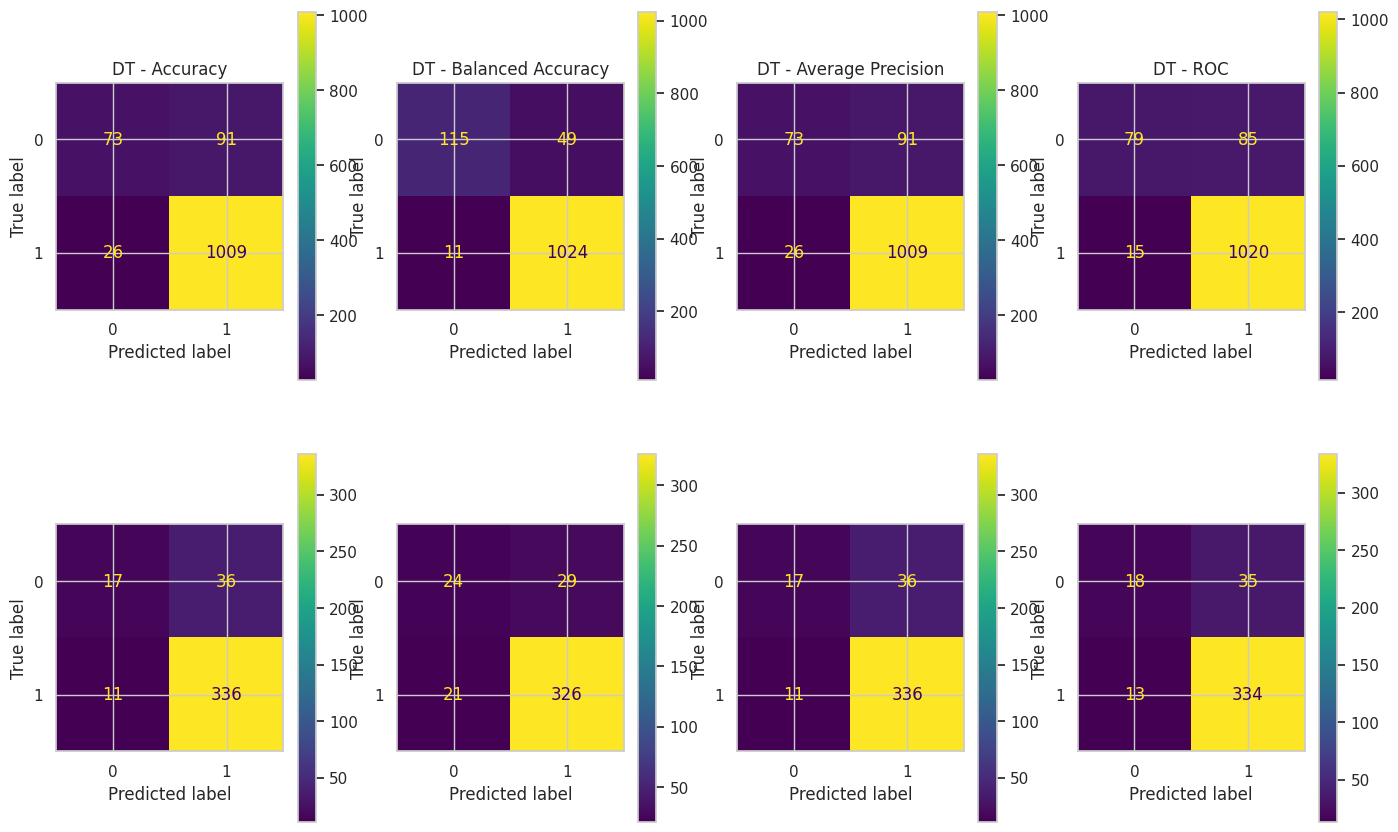

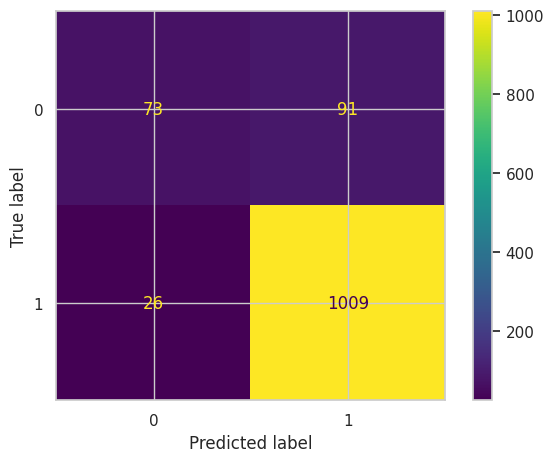

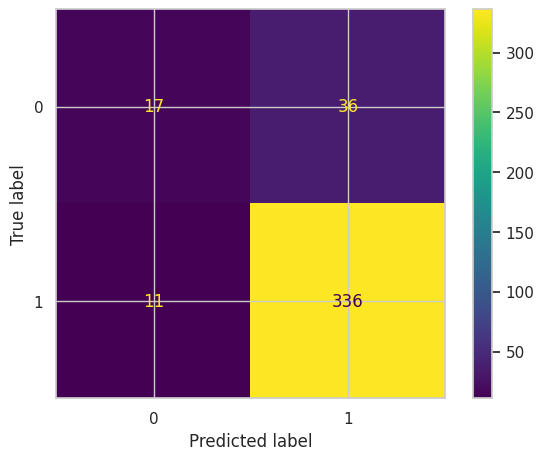

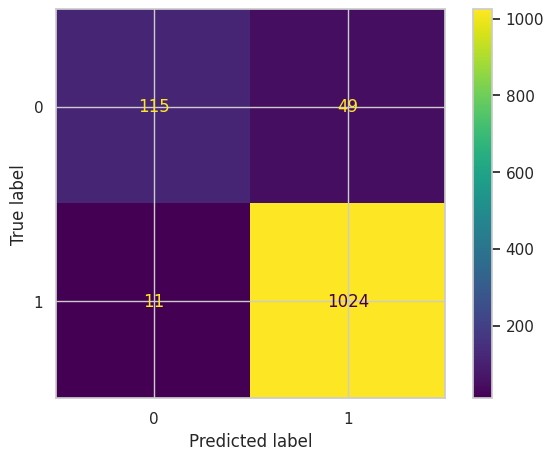

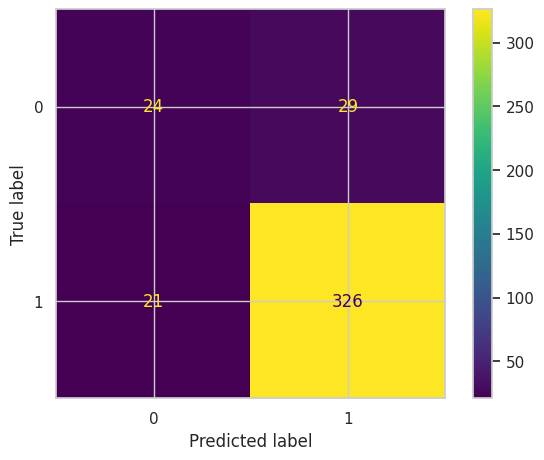

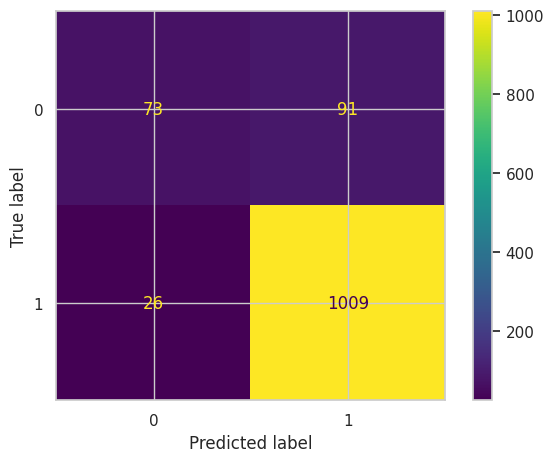

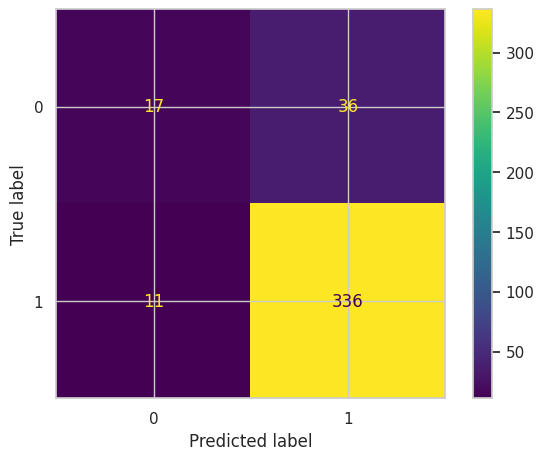

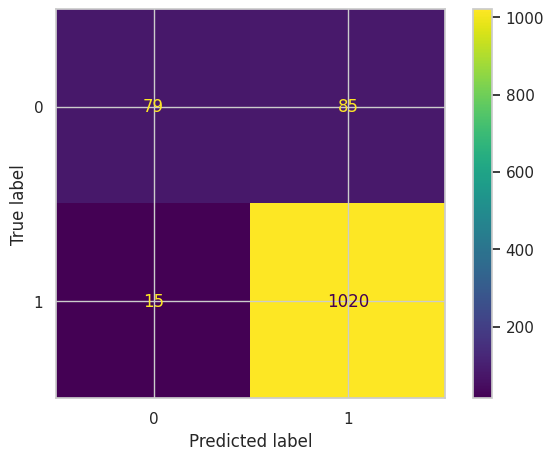

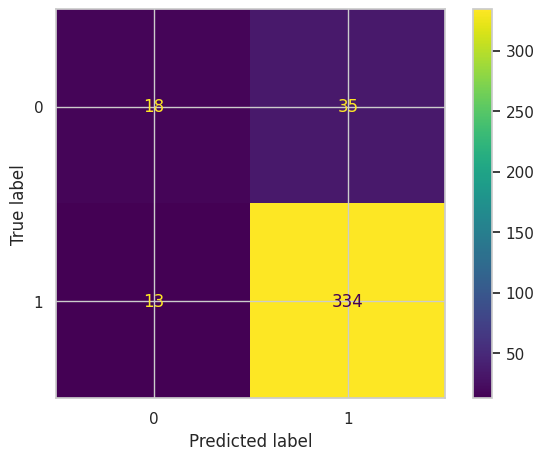

In [38]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("DT - Accuracy")
axs[0,1].set_title("DT - Balanced Accuracy")
axs[0,2].set_title("DT - Average Precision")
axs[0,3].set_title("DT - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_roc).plot(ax = axs[1,3])
plt.show()

###   3. RANDOM FOREST

In [39]:
# Definição dos parâmetros para o Random Forest
# O grid search vai otimizar o número máximo de níveis na árvore
parametros_rf = {'max_depth':range(1,8)}

# Criação do classificador Random Forest com Grid Search
classificador_rf_acc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,  # Parâmetros a serem ajustados
                                scoring='accuracy',  # Métrica de avaliação
                                cv=10)  # Validação cruzada com 10 folds

classificador_rf_bacc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,
                                scoring='balanced_accuracy',
                                cv=10)

classificador_rf_avp = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,
                                scoring='average_precision',
                                cv=10)

classificador_rf_roc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,
                                scoring='roc_auc',
                                cv=10)  #

# Treinamento do classificador Random Forest
classificador_rf_acc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_bacc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_avp.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_roc.fit(x_treino, y_treino)  # Dados de treinamento



GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [40]:
print(f'RF - Accuracy: Best Params: {classificador_rf_acc.best_params_}  e Best Score: {classificador_rf_acc.best_score_}')

print(f'RF - Balanced Accuracy: Best Params: {classificador_rf_bacc.best_params_}  e Best Score: {classificador_rf_bacc.best_score_}')

print(f'RF - average precision: Best Params: {classificador_rf_avp.best_params_}  e Best Score: {classificador_rf_avp.best_score_}')

print(f'RF - ROC : Best Params: {classificador_rf_roc.best_params_}  e Best Score: {classificador_rf_roc.best_score_}')


RF - Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.8999439775910364
RF - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.6844131650046128
RF - average precision: Best Params: {'max_depth': 7}  e Best Score: 0.9810272751777868
RF - ROC : Best Params: {'max_depth': 7}  e Best Score: 0.901133315303343


In [41]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_rf_acc = classificador_rf_acc.predict(x_teste)
previsoes_rf_bacc = classificador_rf_bacc.predict(x_teste)
previsoes_rf_avp = classificador_rf_avp.predict(x_teste)
previsoes_rf_roc = classificador_rf_roc.predict(x_teste)

previsoes_rf_acc_treino = classificador_rf_acc.predict(x_treino)
previsoes_rf_bacc_treino = classificador_rf_bacc.predict(x_treino)
previsoes_rf_avp_treino = classificador_rf_avp.predict(x_treino)
previsoes_rf_roc_treino = classificador_rf_roc.predict(x_treino)

# Calcula a acurácia, precisão, recall e F1-Score das previsões comparando com os valores reais nos dados de teste.
print(f'RF - Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_acc, y_teste)}  e Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: Precision Score: {precision_score(previsoes_rf_acc, y_teste)}  e Accuracy: Precision Score TREINO: {precision_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: Recall Score: {recall_score(previsoes_rf_acc, y_teste)}  e Accuracy: Recall Score TREINO: {recall_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: F1-Score Score: {f1_score(previsoes_rf_acc, y_teste)}  e Accuracy: F1-Score Score TREINO: {f1_score(previsoes_rf_acc_treino, y_treino)}')
print("\n")
print(f'RF - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: Precision Score: {precision_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: Precision Score TREINO: {precision_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: Recall Score: {recall_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: Recall Score TREINO: {recall_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: F1-Score Score: {f1_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: F1-Score Score TREINO: {f1_score(previsoes_rf_bacc_treino, y_treino)}')
print("\n")
print(f'RF - Average Precision: Accuracy Score: {accuracy_score(previsoes_rf_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: Precision Score: {precision_score(previsoes_rf_avp, y_teste)}  e Average Precision: Precision Score TREINO: {precision_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: Recall Score: {recall_score(previsoes_rf_avp, y_teste)}  e Average Precision: Recall Score TREINO: {recall_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: F1-Score Score: {f1_score(previsoes_rf_avp, y_teste)}  e Average Precision: F1-Score Score TREINO: {f1_score(previsoes_rf_avp_treino, y_treino)}')
print("\n")
print(f'RF - ROC : Accuracy Score: {accuracy_score(previsoes_rf_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: Precision Score: {precision_score(previsoes_rf_roc, y_teste)}  e ROC: Precision Score TREINO: {precision_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: Recall Score: {recall_score(previsoes_rf_roc, y_teste)}  e ROC: Recall Score TREINO: {recall_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: F1-Score Score: {f1_score(previsoes_rf_roc, y_teste)}  e ROC: F1-Score Score TREINO: {f1_score(previsoes_rf_roc_treino, y_treino)}')


RF - Accuracy: Accuracy Score: 0.89  e Accuracy: Accuracy Score TREINO: 0.9649708090075062
RF - Accuracy: Precision Score: 0.9711815561959655  e Accuracy: Precision Score TREINO: 1.0
RF - Accuracy: Recall Score: 0.9083557951482479  e Accuracy: Recall Score TREINO: 0.9610027855153204
RF - Accuracy: F1-Score Score: 0.9387186629526463  e Accuracy: F1-Score Score TREINO: 0.9801136363636364


RF - Balanced Accuracy: Accuracy Score: 0.885 e Balanced Accuracy: Accuracy Score TREINO: 0.963302752293578
RF - Balanced Accuracy: Precision Score: 0.9654178674351584  e Balanced Accuracy: Precision Score TREINO: 1.0
RF - Balanced Accuracy: Recall Score: 0.907859078590786  e Balanced Accuracy: Recall Score TREINO: 0.959221501390176
RF - Balanced Accuracy: F1-Score Score: 0.9357541899441341  e Balanced Accuracy: F1-Score Score TREINO: 0.97918637653737


RF - Average Precision: Accuracy Score: 0.89  e Average Precision: Accuracy Score TREINO: 0.9624687239366139
RF - Average Precision: Precision Score: 0

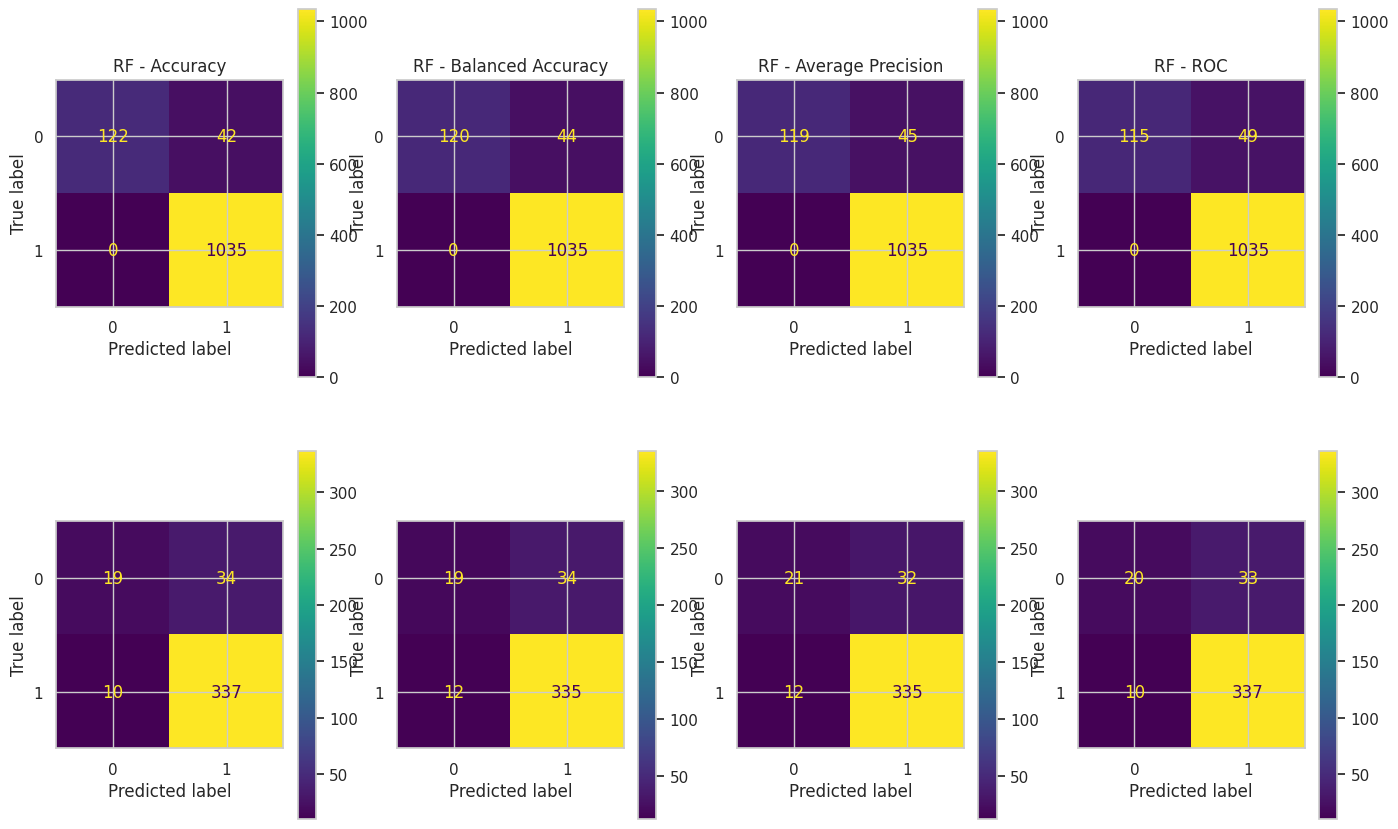

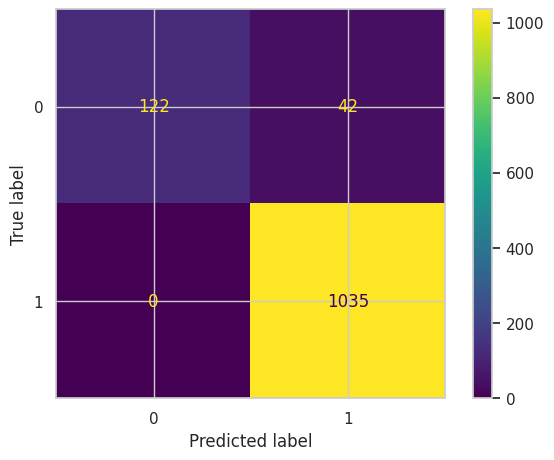

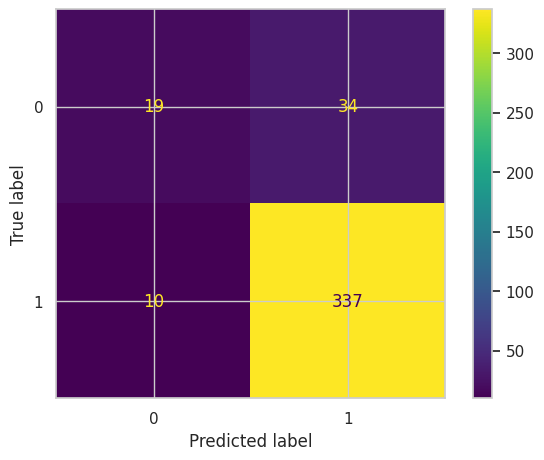

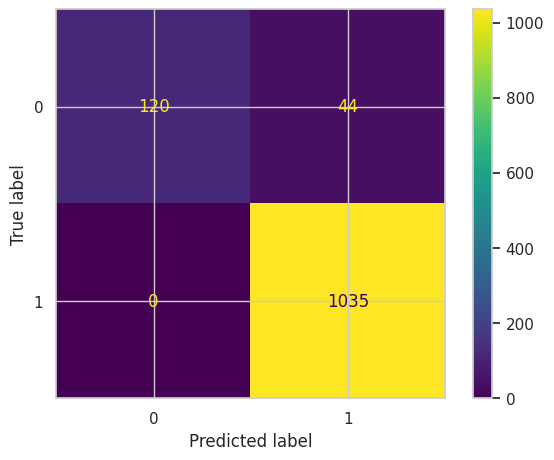

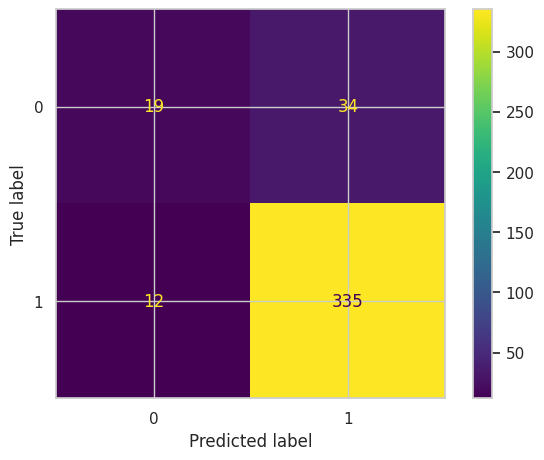

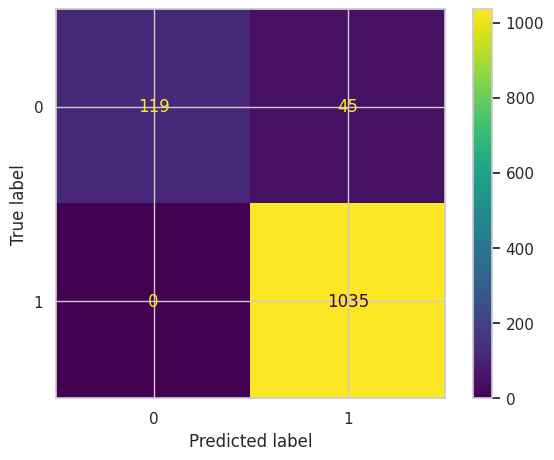

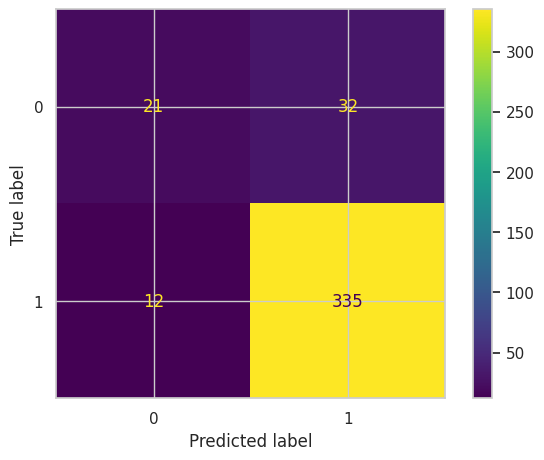

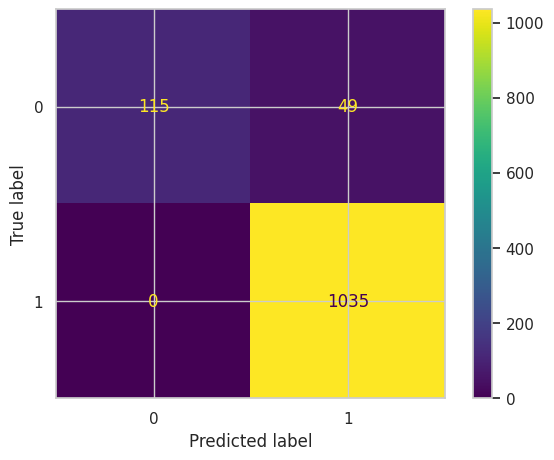

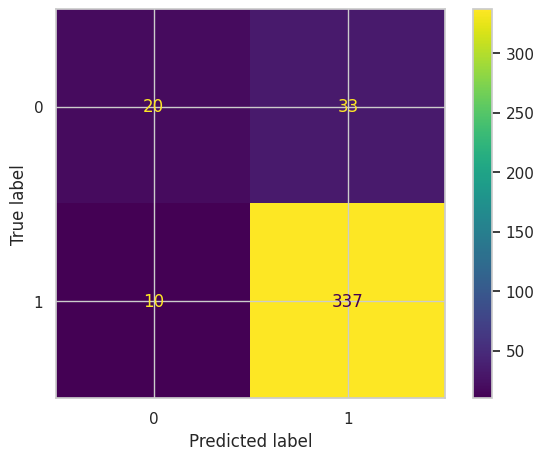

In [42]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("RF - Accuracy")
axs[0,1].set_title("RF - Balanced Accuracy")
axs[0,2].set_title("RF - Average Precision")
axs[0,3].set_title("RF - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_roc).plot(ax = axs[1,3])
plt.show()

# Avalição do modelos através da curva R.O.C


In [43]:
def roc_plot(y_test, y_predict, roc_auc, titulo):


    fpr, tpr, thr = roc_curve(y_test, y_predict)

    roc_display = RocCurveDisplay(fpr = fpr, tpr= tpr, roc_auc = roc_auc).plot()

    plt.title(titulo)
    plt.plot([0,1],[0,1],'g')

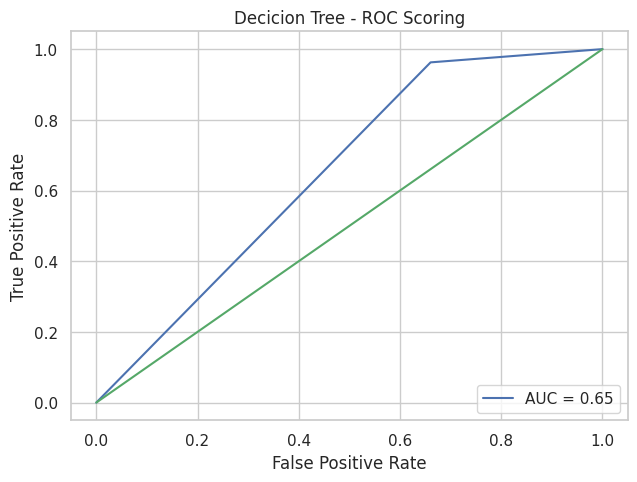

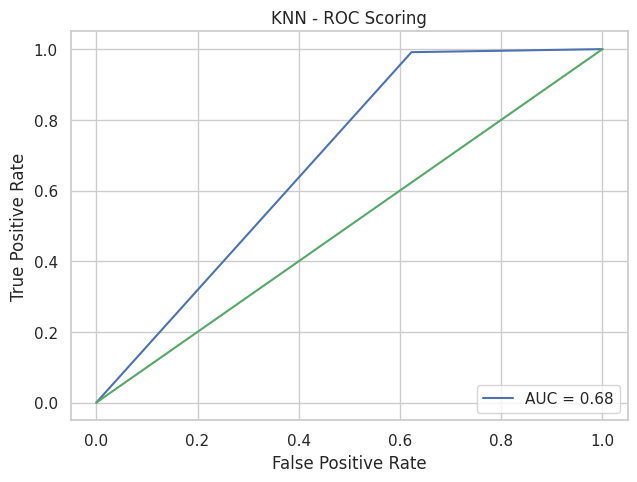

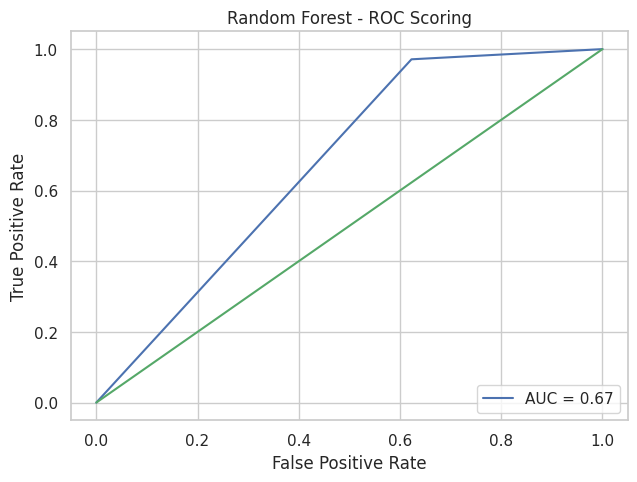

In [44]:

roc_plot(y_teste, previsoes_dt_roc, roc_auc_score(y_teste, previsoes_dt_roc), 'Decicion Tree - ROC Scoring')

roc_plot(y_teste, previsoes_roc, roc_auc_score(y_teste, previsoes_roc), 'KNN - ROC Scoring')

roc_plot(y_teste, previsoes_rf_roc, roc_auc_score(y_teste, previsoes_rf_roc), 'Random Forest - ROC Scoring')


No teste ROC o modelo com melhor perfomance foi o KNN.

# Conclusão

Em resumo, a construção e avaliação de um modelo de classificação de qualidade de vinhos com duas classes, "Boa" ou "Ruim", utilizando os algoritmos KNN, Decision Tree e Random Forest, demonstrou um desempenho notável, atingindo uma acurácia em torno de 90%. Esse resultado sugere que os modelos são capazes de fazer previsões precisas e confiáveis.

Ao utilzar diferentes métricas, modelos diferentes performaram melhor.

Na análise da curva ROC, o modelo de melhor perfomance foi o KNN.

Em última análise, este trabalho fornece uma base sólida para a classificação de qualidade de vinhos, mas aprimoramentos contínuos e ajustes podem ser explorados para otimizar ainda mais a precisão e a eficácia do modelo.




